In [ ]:
####### WEB SCRAPING ######

# Importing Libraries
import os
import openpyxl
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys  
import time

# Setting up a directory
os.getcwd()
os.chdir("C:\\Users\\stuze\\OneDrive\\Masaüstü\\Sumter")
os.listdir()

# Pulling Property Identification Number (PIN) from Excel spreadsheet.
direct=r'C:\\Users\\stuze\\OneDrive\\Masaüstü\\Sumter\\tv_closed-Salih.xlsx'
wb=openpyxl.load_workbook(direct,data_only=True) 
sh1=wb["K-Codes"]
    

# Appending PIN numbers into a list
PIN=[]

for i in range(2,sh1.max_row):
    cell_object=sh1.cell(row=i,column=1)
    PIN.append(cell_object.value)
    
    


In [ ]:
# Creating a function to use executable Chrome browser to open the Sumter 
# County Proprety Appraiser Site, search PIN numbers and finally write 
# results into a data frame. Data points we want to extract are Owner's,
# Name, Section/Township/Range, Sale Date OR Book/Page
# Sale Price and Grantee.

def scrape(PIN):
    
    result=pd.DataFrame(columns=["Owner","Section","Most Recent Sale Date","Book Number","Sale Price","Grantee"])
    
    PATH='C:\Program Files (x86)\chromedriver.exe'  
    
    for pin in PIN:
        
        try:
            driver=webdriver.Chrome(PATH)  #Initiating Selenium module
            time.sleep(3)
            driver.get('http://www.sumterpa.com/GIS/')  # Goes to website
            time.sleep(3)
            
            driver.switch_to.frame(driver.find_element_by_xpath('//iframe[@id="S_Main"]'))  # Gets rid of pop up window
            popup=driver.find_element_by_xpath('//*[@id="div_Alert_OnLoad"]/table/tbody/tr[2]/td/table/tbody/tr/td/input')
            popup.click()
            time.sleep(3)
            
            search=driver.find_element_by_xpath("/html/body/form/table/tbody/tr/td[3]/table/tbody/tr/td/div/table/tbody/tr/td/table/tbody/tr[4]/td[2]/input")
            search.send_keys(pin)
            time.sleep(3)
            
            start=driver.find_element_by_xpath("/html/body/form/table/tbody/tr/td[3]/table/tbody/tr/td/div/table/tbody/tr/td/table/tbody/tr[9]/td/table/tbody/tr[2]/td[3]/input")
            start.click()
            time.sleep(3)
            
            testing=driver.find_element_by_xpath("/html[1]/body[1]/table[1]/tbody[1]/tr[1]/td[1]/div[1]/form[1]/table[1]/tbody[1]/tr[1]/td[1]/table[1]/tbody[1]/tr[2]/td[1]/table[1]/tbody[1]/tr[2]/td[1]/table[1]/tbody[1]/tr[1]/td[2]/font[1]")
 
            
        except:
            driver.quit()
            continue
                       
        else:
            owner=driver.find_element_by_xpath("/html[1]/body[1]/table[1]/tbody[1]/tr[1]/td[1]/div[1]/form[1]/table[1]/tbody[1]/tr[1]/td[1]/table[1]/tbody[1]/tr[2]/td[1]/table[1]/tbody[1]/tr[2]/td[1]/table[1]/tbody[1]/tr[1]/td[2]/font[1]")
            section=driver.find_element_by_xpath("/html[1]/body[1]/table[1]/tbody[1]/tr[1]/td[1]/div[1]/form[1]/table[1]/tbody[1]/tr[1]/td[1]/table[1]/tbody[1]/tr[2]/td[1]/table[1]/tbody[1]/tr[2]/td[1]/table[2]/tbody[1]/tr[2]/td[2]/font[1]")
            recent_sale_date=driver.find_element_by_xpath("/html[1]/body[1]/table[1]/tbody[1]/tr[1]/td[1]/div[1]/form[1]/table[1]/tbody[1]/tr[1]/td[1]/table[1]/tbody[1]/tr[2]/td[1]/table[2]/tbody[1]/tr[3]/td[1]/table[1]/tbody[1]/tr[2]/td[1]/font[1]")
            book_page=driver.find_element_by_xpath("/html[1]/body[1]/table[1]/tbody[1]/tr[1]/td[1]/div[1]/form[1]/table[1]/tbody[1]/tr[1]/td[1]/table[1]/tbody[1]/tr[2]/td[1]/table[2]/tbody[1]/tr[3]/td[1]/table[1]/tbody[1]/tr[2]/td[2]/font[1]/a[1]/font[1]")
            sale_price=driver.find_element_by_xpath("/html[1]/body[1]/table[1]/tbody[1]/tr[1]/td[1]/div[1]/form[1]/table[1]/tbody[1]/tr[1]/td[1]/table[1]/tbody[1]/tr[2]/td[1]/table[2]/tbody[1]/tr[3]/td[1]/table[1]/tbody[1]/tr[2]/td[5]/font[1]")
            grantee=driver.find_element_by_xpath("/html[1]/body[1]/table[1]/tbody[1]/tr[1]/td[1]/div[1]/form[1]/table[1]/tbody[1]/tr[1]/td[1]/table[1]/tbody[1]/tr[2]/td[1]/table[2]/tbody[1]/tr[3]/td[1]/table[1]/tbody[1]/tr[2]/td[6]/font[1]")
            result.loc[pin]=[owner.text,section.text,recent_sale_date.text,book_page.text,sale_price.text,grantee.text]
            
            driver.quit()
            
            
                
    return result

         

# Running the function on a sample PIN number. (Since, I can't share PIN numbers from my work)
sumter2=scrape(PIN=["G14B054"])

# Writing results to an Excel spreadsheet
sumter.to_excel("Sumter Data.xlsx")


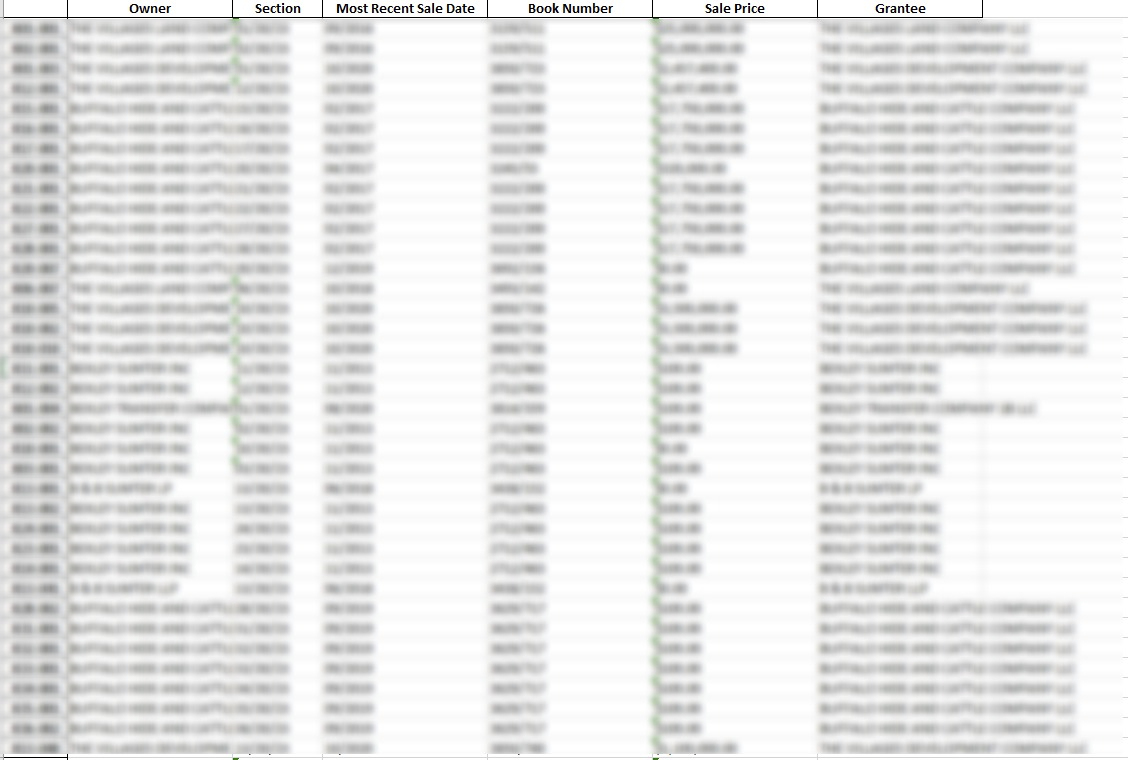